<a href="https://colab.research.google.com/github/Avani-Agarwal1999/MACHINE-LEARNING-CS391L/blob/main/EIGENDIGITS%20ASSIGNMENT/aa88539.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and dataset


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
import scipy.linalg as LA
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

#Reshaping 
X_train = X_train.reshape(len(X_train),784)
X_test = X_test.reshape(len(X_test),784)

print(X_train.shape)
print(X_test.shape)

#Taking transpose for hw1function
X_train=X_train.T
X_test=X_test.T

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
(784, 60000)
(784, 10000)


# hw1FindEigendigits function to return mean and eigenvectors calculated over a matrix A that has dimensions (784,k). Here k is the number of sample images used to calculate eigenvectors


In [2]:
def hw1FindEigendigits(A):
    #Calculating the mean
    m=np.mean(A,axis=1) 
    m=m[:,np.newaxis] 
    
    #Centering the data  
    A=A-m 
    #print("In the function",A.shape)
               

    #Calculating the Co-variance matrix
    C=A.T@A
  
    #Calculating Eigenvectors(v) and Eigenvalues(evals) and sorting in descending order
    evals,v=LA.eig(C)    
    sorted_idx=np.argsort(evals)
    sorted_idx=sorted_idx[::-1] 
    v=v[:,sorted_idx]
    evals=evals[sorted_idx]
    
    #Normalising 
    v=A @ v            
    V=normalize(v.real, axis=0)
    return m,V

In [3]:
k=5000
A=X_train[:,:k]
print(A.shape)

#Calculating the mean and the eigenvectors by calling hw1FindEigendigits function
mean,eigenvecs=hw1FindEigendigits(A)


(784, 5000)


In [4]:
print(mean.shape)
print(eigenvecs.shape)
for i in range(1,3):
  print(mean[i][0])
  for j in range(482,487):
    print(eigenvecs[j][i])

(784, 1)
(784, 5000)
0.0
0.006568805218115998
-0.00022052574683794338
-0.0089979802643705
-0.014389644750723017
-0.007210114838332236
0.0
0.037484259616956006
0.05643809337924314
0.06964896256220462
0.07023091429897373
0.05796681199942377


#Displaying some of the training images.

(784, 5000)
(5000, 28, 28)


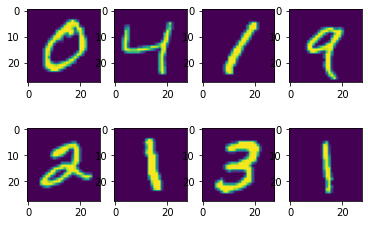

(784, 5000)


In [5]:
print(A.shape)
num_of_images=10

pixel_data=A.T.reshape(A.shape[1],28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(6,4))


for i in range(1,9):
    fig.add_subplot(2,4,i)
    plt.imshow(pixel_data[i])
plt.show()

print(A.shape)
#for i,img in enumerate(pixel_data):
    #fig.add_subplot(2,4,1+i)
    #plt.imshow(img)
#plt.show()


#Objective 1: Display some of the eigenvectors to see what they look like -- 2 points



(784, 5000)
(5000, 28, 28)


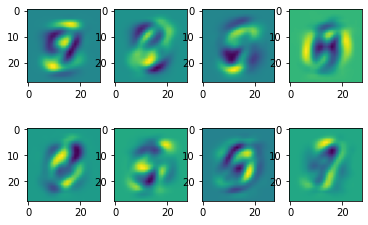

In [6]:
#Displaying some of the Eigenvectors calculated using 5000 sample images -- 2 points
print(eigenvecs.shape)
num_of_images=10

pixel_data=eigenvecs.T.reshape(eigenvecs.shape[1],28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(6,4))


for i in range(1,9):
    fig.add_subplot(2,4,i)
    plt.imshow(pixel_data[i])
plt.show()

#Objective 2: Display some reconstructions of the test digits using the projection.  -- 2 points


(784, 20)
(784, 1)
(20, 784)
(784, 20)
(20, 28, 28)


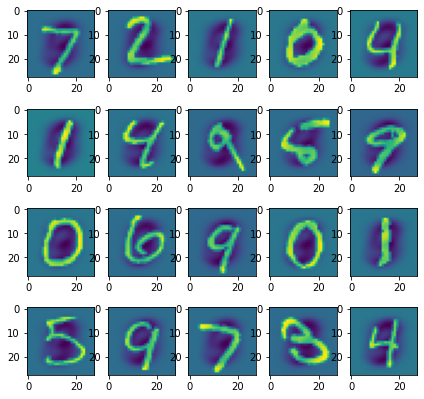

In [7]:
#Here p is the number reconstructions of the test digits that will be displayed
p=20
new_data=X_test[:,:p] 
print(new_data.shape)
print(mean.shape)

#Taking eigenvecs = 70
new_data=new_data - mean
new_data=new_data.T

#Calculating the new data matrix
projection=new_data@eigenvecs[:,:70]

#Computing original matrix again
reconstruct=(eigenvecs[:,:70]@projection.T)
reconstruct+=mean

#print(reconstruct.shape)
print(new_data.shape)
print(reconstruct.shape)

num_of_images=20

pixel_data=new_data.reshape(20,28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(7,7))

for i in range(0,20):
    fig.add_subplot(4,5,i+1)
    plt.imshow(pixel_data[i])
plt.show()

(20, 28, 28)


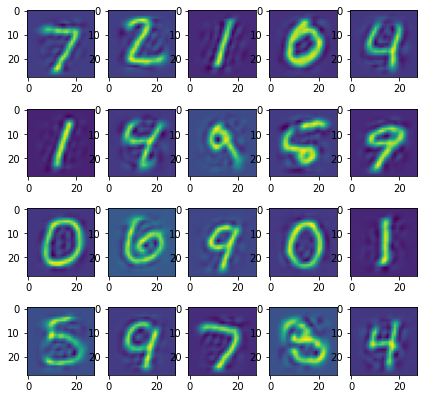

In [8]:
#Reconstructed test digits displayed
pixel_data=reconstruct.T.reshape(20,28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(7,7))
for i in range(0,20):
    fig.add_subplot(4,5,i+1)
    plt.imshow(pixel_data[i])
plt.show()

In [9]:
print(X_train.shape)
t=[100,500,1000,2000,5000]
for i in range(0,5):
  A=X_train[:,np.random.randint(A.shape[1], size=t[i])]
  print(A.shape)


(784, 60000)
(784, 100)
(784, 500)
(784, 1000)
(784, 2000)
(784, 5000)


#For different amount of k we calculate the number of eigenvectors required to expalin the variance i.e. the part of the model's total variance that is explained by factors that are actually present and isn't due to error variance. Aslo we calculate number of eigenvectors whose values are greater than zero for different amounts of k.

(784, 60000)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


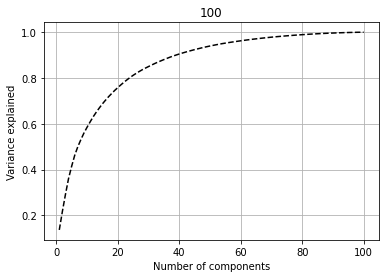

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


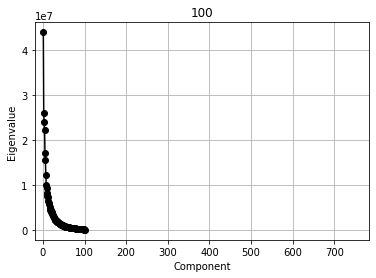

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


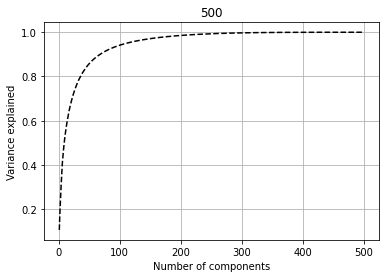

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


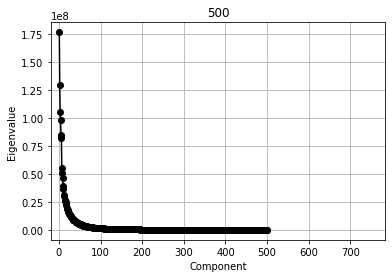

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


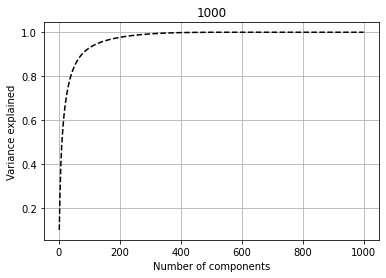

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


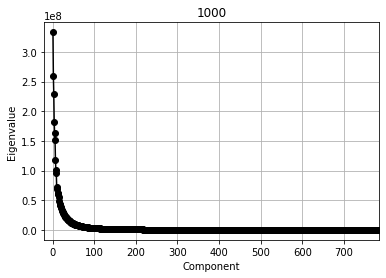

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


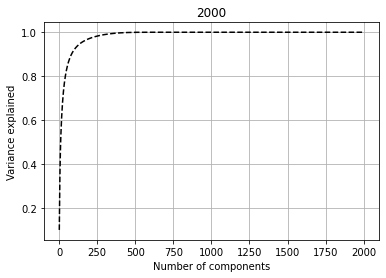

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


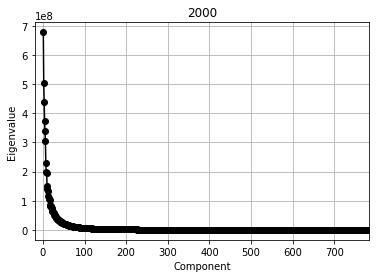

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


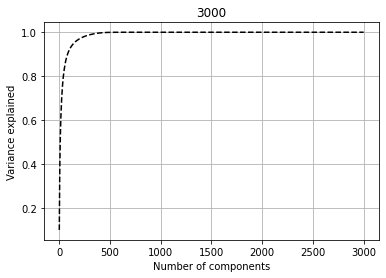

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


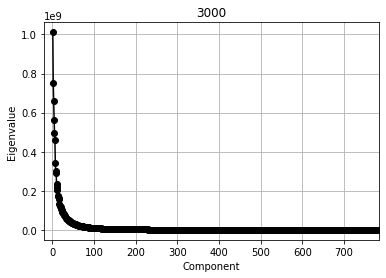

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


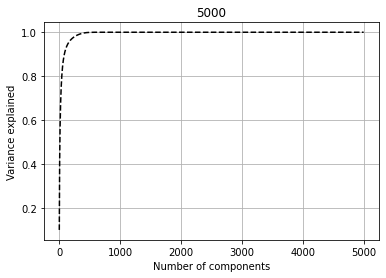

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


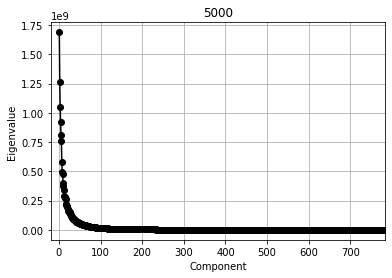

In [10]:
#Calculating the top n eigenvectors needed for proper reconstruction of data for different amounts of k taken.
print(X_train.shape)
t=[100,500,1000,2000,3000,5000]
for i in range(0,6):

  A=X_train[:,:t[i]]
  #print(A.shape)

  num=t[i]

  m=np.mean(A,axis=1) 
  m=m[:,np.newaxis] 
    
  #Centering the data  
  A=A-m 
  #print("In the function",A.shape)
               

  #Calculating the Co-variance matrix
  C=A.T@A
  
  #Calculating Eigenvectors(v) and Eigenvalues(evals) and sorting in descending order
  evals,v=LA.eig(C)    
  sorted_idx=np.argsort(evals)
  sorted_idx=sorted_idx[::-1] 
  v=v[:,sorted_idx]
  evals=evals[sorted_idx]
    
  csum=np.cumsum(evals) 
  variance_explained= csum / np.sum(evals)
  
  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,'--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  
  plt.title(num)
  plt.grid()
  plt.show()

  plt.figure()
  plt.xlim(-20,784)
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.grid()
  plt.title(num)
  plt.show()  

# Calculating the number of eigenvectors that give max accuracy for k=1000 images. For experimentation puporses value of k can be changed in below cells to find top n eigenvectors that give max accuracy.


Accuracy for 10 eigvectors is 0.8974
Accuracy for 20 eigvectors is 0.9446
Accuracy for 30 eigvectors is 0.9529
Accuracy for 40 eigvectors is 0.9515
Accuracy for 50 eigvectors is 0.9515
Accuracy for 60 eigvectors is 0.952
Accuracy for 70 eigvectors is 0.9501
Accuracy for 80 eigvectors is 0.9479
Accuracy for 90 eigvectors is 0.9474
Accuracy for 100 eigvectors is 0.9461
Accuracy for 150 eigvectors is 0.9437


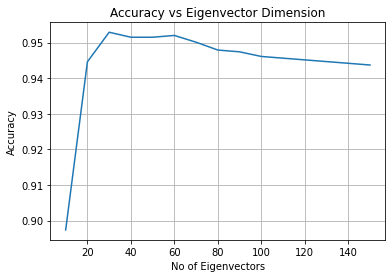

In [11]:
def eig_k(mean,V):
  n_eig_samples = np.array([10,20,30,40,50,60,70,80,90,100,150])
  eig_acc = []

  for n in n_eig_samples: 
    eigenvecs=V[:,:n]
    X_train_proj=(X_train-mean).T@eigenvecs
    X_test_proj=(X_test-mean).T@eigenvecs
    a, X_train_sample,b, y_train_sample = train_test_split(X_train_proj, y_train, test_size=0.1, random_state=8)

    kNN = KNeighborsClassifier(3, weights='distance')
    kNN.fit(X_train_sample,y_train_sample)
    accuracy = kNN.score(X_test_proj, y_test)
    eig_acc.append(accuracy)
    print("Accuracy for %s eigvectors is %s" %(n, round(accuracy, 4)))
    

  plt.plot(n_eig_samples, eig_acc,label="Test Data1")
  plt.xlabel("No of Eigenvectors")
  plt.ylabel("Accuracy")
  plt.title('Accuracy vs Eigenvector Dimension')
  plt.grid()
  plt.show()


A = X_train[:,:1000] #(784,no_of_images = size)
mean, eigenvecs = hw1FindEigendigits(A)
eig_k(mean,eigenvecs)

#Calculating how many neighbours should be take in classifier to get optimal strategy using k=1000. From explained_varaince graphs we know that top30 eigenvectors are needed for maximum accuracy for k=1000.


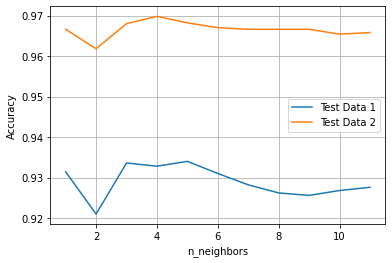

In [12]:
def neighbor_graph(mean,eigenvecs):
  X_train_proj=(X_train-mean).T @ eigenvecs[:,:30]
  X_test_proj=(X_test-mean).T @ eigenvecs[:,:30]
    
  a, X_train_sample,b, y_train_sample = train_test_split(X_train_proj, y_train, test_size=0.1, random_state=8)
  #print(X_test.shape)
  X_test_sample = X_test_proj[:5000,:]
  y_test_sample = y_test[:5000]

  X_test_sample1 = X_test_proj[5000:10000,:]
  y_test_sample1 = y_test[5000:10000]

  neighbors=np.arange(1,12)
  test_accuracy = np.empty(len(neighbors))
  test_accuracy1=np.empty(len(neighbors))

  for i, k in enumerate(neighbors):
    kNN= KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train_sample, y_train_sample)
    test_accuracy[i]=kNN.score(X_test_sample, y_test_sample)
    test_accuracy1[i]=kNN.score(X_test_sample1, y_test_sample1)

  plt.plot(neighbors, test_accuracy, label = 'Test Data 1')
  plt.plot(neighbors, test_accuracy1, label = 'Test Data 2')
  plt.legend()
  plt.grid()
  plt.xlabel('n_neighbors')
  plt.ylabel('Accuracy')
  plt.show()

A = X_train[:,:1000] #(784,no_of_images = size)
mean, eigenvecs = hw1FindEigendigits(A)
neighbor_graph(mean,eigenvecs)



In [13]:
print(X_train[:,55000:60000].shape)
print(X_test.T.shape)

(784, 5000)
(10000, 784)


#Calculating the no_of_training samples vs accuracy graph for k=1000 images and neighbours =5.

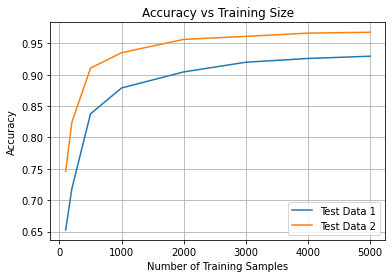

In [14]:
def samples_vs_accuracy_graph(mean,eigenvecs):
  n_train_pts = np.array([100, 200, 500, 1000, 2000, 3000, 4000, 5000])
  acc=[]
  acc1=[]
 
  for size in n_train_pts: 
    X_train_proj = (X_train - mean).T @ eigenvecs[:,:30]
    X_test_proj  = (X_test  - mean).T @ eigenvecs[:,:30]
    
    a, X_train_sample,b, y_train_sample = train_test_split(X_train_proj, y_train, test_size=size/60000, random_state=8)
    X_test_sample = X_test_proj[:5000,:]
    y_test_sample = y_test[:5000]
    X_test_sample1 = X_test_proj[5000:10000,:]
    y_test_sample1 = y_test[5000:10000]


    kNN = KNeighborsClassifier(5, weights='distance')
    kNN.fit(X_train_sample,y_train_sample)
    accuracy= kNN.score(X_test_sample, y_test_sample)
    acc.append(accuracy)
    accuracy1=kNN.score(X_test_sample1, y_test_sample1)
    acc1.append(accuracy1)
    #print("Testing Accuracy for training size %s: %s\n" %(size, round(acc, 4)))
   
  plt.plot(n_train_pts,acc,label="Test Data 1")
  plt.plot(n_train_pts,acc1,label="Test Data 2")
  plt.xlabel('Number of Training Samples')
  plt.ylabel('Accuracy')
  plt.title('Accuracy vs Training Size')
  plt.grid()
  plt.legend()
  plt.show()

A = X_train[:,:1000] #(784,no_of_images = size)
mean, eigenvecs = hw1FindEigendigits(A)
samples_vs_accuracy_graph(mean,eigenvecs)